In [4]:
#Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://drive.google.com/uc?export=download&id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ'
data = pd.read_csv(url)

# Display basic info
print(data.info())

# Handle missing values if any
data = data.dropna()

# Assuming the target column is 'target', convert it to integer type
data['target'] = data['target'].astype(int)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Scale numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=[np.number]).columns.difference(['target'])
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0

In [5]:
#Q2. Split the dataset into a training set (70%) and a test set (30%).
X = data.drop(columns=['target'])  # Assuming 'target' is the column name for the label
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [6]:
'''Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.'''
# Train a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, random_state=42)

In [7]:
#Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


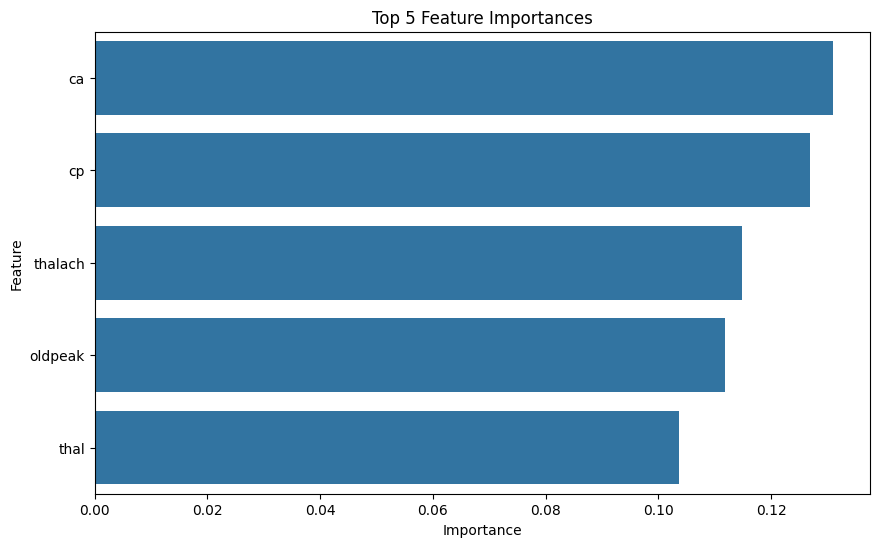

In [8]:
'''Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.'''
# Feature importances
importances = rf_clf.feature_importances_
feature_names = X.columns

# Top 5 most important features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 5 Feature Importances')
plt.show()


In [9]:
'''Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.'''
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [10]:
'''Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.'''
# Train the tuned model
best_rf_clf = grid_search.best_estimator_

# Predict on the test set
y_pred_tuned = best_rf_clf.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f'Accuracy (Tuned): {accuracy_tuned}')
print(f'Precision (Tuned): {precision_tuned}')
print(f'Recall (Tuned): {recall_tuned}')
print(f'F1 Score (Tuned): {f1_tuned}')


Accuracy (Tuned): 0.8351648351648352
Precision (Tuned): 0.8301886792452831
Recall (Tuned): 0.88
F1 Score (Tuned): 0.8543689320388349


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


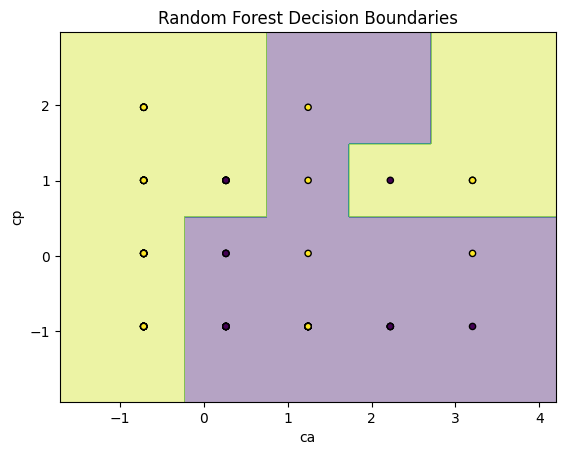

Insights:
- The decision boundaries show how the classifier separates the two classes using the two most important features.
Limitations:
- The model's interpretability decreases as more features are used.
- Feature importance may not always align with domain knowledge or real-world significance.


In [11]:
'''Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.'''
# For visualization, we will use only the two most important features
top_two_features = top_features['Feature'].values[:2]

# Train a random forest classifier on the selected two features
rf_clf_2d = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf_2d.fit(X_train[top_two_features], y_train)

# Plot decision boundaries
import numpy as np

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel(top_two_features[0])
    plt.ylabel(top_two_features[1])
    plt.show()

# Plotting
plot_decision_boundary(rf_clf_2d, X_test[top_two_features], y_test, 'Random Forest Decision Boundaries')

# Discussing insights and limitations
print("Insights:")
print("- The decision boundaries show how the classifier separates the two classes using the two most important features.")
print("Limitations:")
print("- The model's interpretability decreases as more features are used.")
print("- Feature importance may not always align with domain knowledge or real-world significance.")
